# About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.<br>

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!<br>

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.<br>

## Agenda

The company wants to know:

Which $variables$ are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

### Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
  - 1: Clear, Few clouds, partly cloudy, partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [43]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [44]:
# loading the dataset and making a copy of it so that original can be intact

original_data = pd.read_csv("yulu_data.csv")
data = original_data.copy(deep= True)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [45]:
# know the structure of the data
print(f"Number of Rows in the given DataSet: {data.shape[0]}") 
print(f"Number of Columns in the given DataSet: {data.shape[1]}") 

Number of Rows in the given DataSet: 10886
Number of Columns in the given DataSet: 12


In [46]:
# dtypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [47]:
# any null values?
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [48]:
# any duplicate values?
data.duplicated().value_counts()

False    10886
Name: count, dtype: int64

#### Why Convert Numeric Categorical Values?
- Interpretation: When analyzing or visualizing data, it’s easier to understand and interpret results with clear categorical labels (e.g., "Spring" instead of "1").
- Analysis Tools: Many machine learning algorithms or statistical tests handle categorical data better when encoded explicitly as categories, which prevents them from assuming numerical relationships.

In [49]:
# one of the way is using map method

season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
weather_mapping = {1: "clear", 2: "mist", 3: "light_rain", 4: "heavy_rain"}

data["season"] = data["season"].map(season_mapping)
data["weather"] = data["weather"].map(weather_mapping)

In [50]:
# there are few categorical columns that are numerical let's identify them and convert them to categorical
cat_cols= ["season", "holiday", "workingday", "weather"]

for col in cat_cols:
    data[col] = data[col].astype("category")
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [51]:
# no null values and let's check statistical summary of numerical columns
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


From the above statistical summary we get the mean, Standard Deviation(std), Range (min - max) etc.

In [52]:
data.season.value_counts()

season
winter    2734
fall      2733
summer    2733
spring    2686
Name: count, dtype: int64

In [53]:
# summary of catergorical columms
data.describe(include = "category")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,0,1,clear
freq,2734,10575,7412,7192


## Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

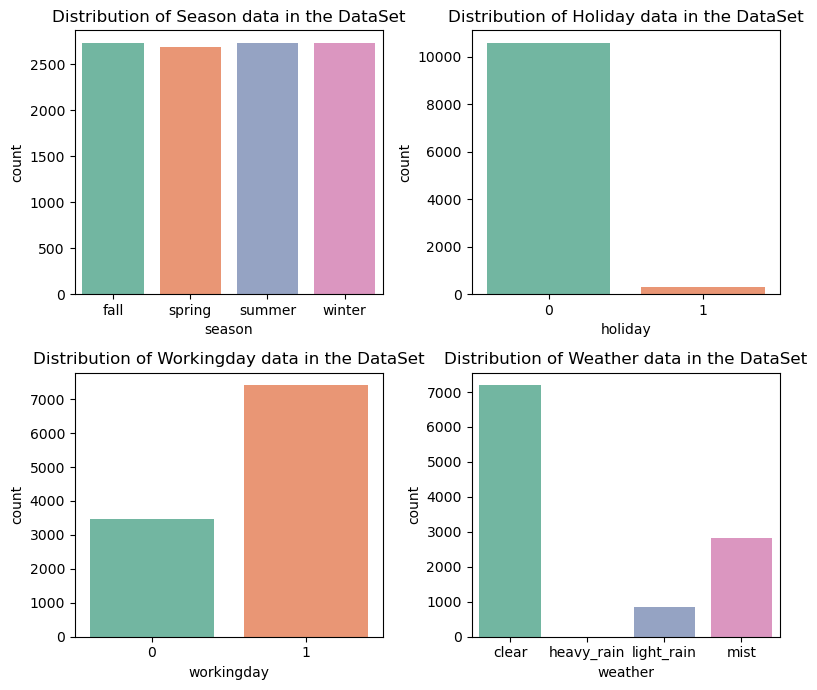

In [54]:
# Univariate - Categorical
plt.figure(figsize= (8,7))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data= data, x= col, palette= "Set2") 
    plt.title(f"Distribution of {col.capitalize()} data in the DataSet")
    
plt.tight_layout()

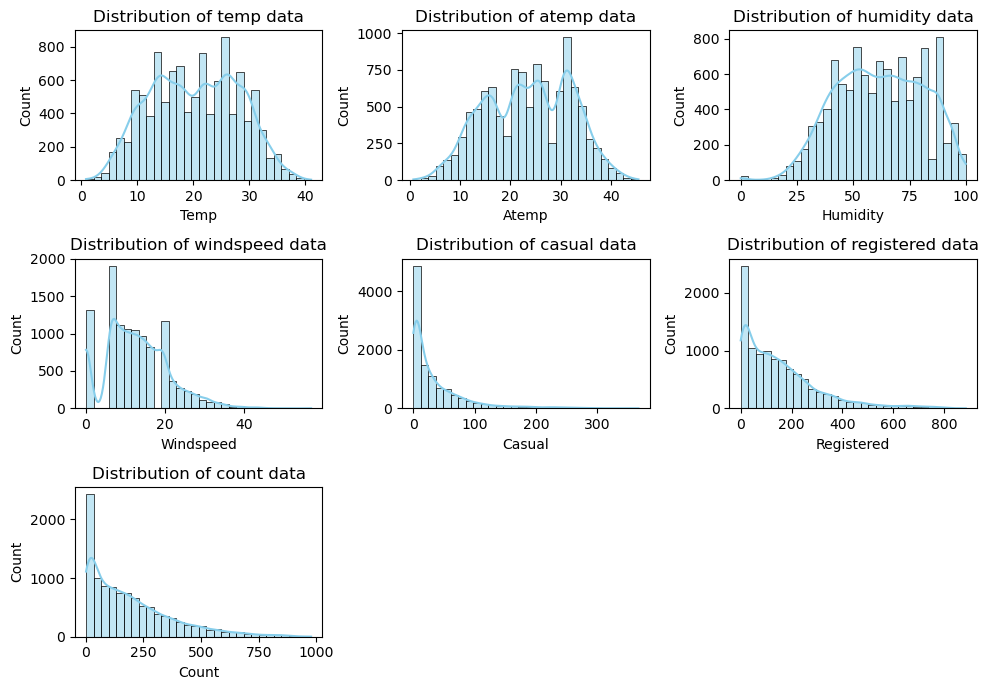

In [55]:
# let's do the same with the Numerical cols

numerical_cols = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

plt.figure(figsize= (10,7))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(data= data, x= col, kde= True, bins= 30, color= "skyblue") 
    plt.title(f"Distribution of {col} data")
    plt.xlabel(col.capitalize())
    
plt.tight_layout()


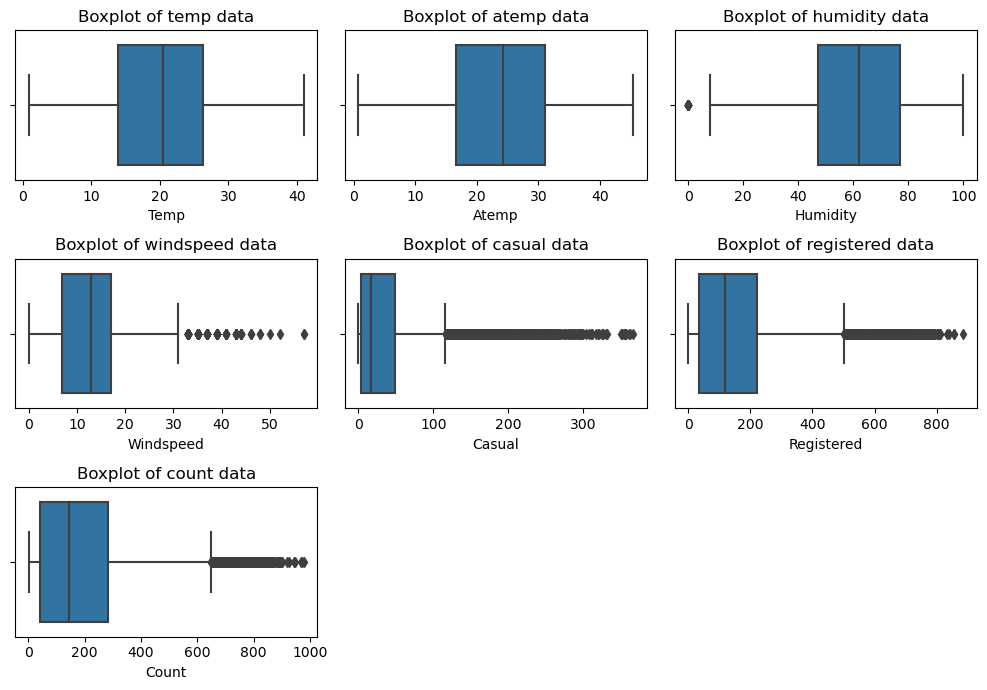

In [56]:
plt.figure(figsize= (10,7))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data= data, x= col) 
    plt.title(f"Boxplot of {col} data")
    plt.xlabel(col.capitalize())
    
plt.tight_layout()

## Observations from Univariate Analysis:
### Categorical Columns:
#### Season:

- Counts: Spring (2686), Summer (2733), Fall (2733), Winter (2734).
- Distribution is fairly uniform across all seasons.
#### Holiday:

- Non-holidays dominate the dataset (10,575 entries or ~97%).
- Holidays are rare (311 entries or ~3%).
#### Working Day:

- Most data points correspond to working days (7,412 or ~68%).
- Non-working days (3,474 or ~32%) are less frequent.
#### Weather:

- Majority of records are in clear or few-cloud conditions (7,192 or ~66%).
- Misty/cloudy conditions (2,834 or ~26%) are the next most common.
- Severe conditions (light_rainfall = 859; heavy_rain = 1) are rare.

### Numerical Columns:
#### Temperature (temp):

- Mean: 20.23°C; Std: 7.79°C; Range: 0.82-41.00°C.
- Distribution is roughly normal.
#### Feels-like Temperature (atemp):

- Mean: 23.66°C; Std: 8.47°C; Range: 0.76–45.45°C.
- Aligns closely with actual temperature but slightly higher on average.
#### Humidity:

- Mean: 61.89%; Std: 19.25%; Range: 0-100%.
- Distribution peaks around the middle range (50-70%).
#### Windspeed:

- Mean: 12.80 km/h; Std: 8.16 km/h; Range: 0-56.99 km/h.
- Skewed toward lower wind speeds, with many occurrences at 0.
#### Casual Users:

- Mean: 36.02; Std: 49.96; Range: 0 - 367.
- Highly skewed with most values near 0.
#### Registered Users:

- Mean: 155.55; Std: 151.04; Range: 0-886.
- Distribution is concentrated around 0-300.
#### Total Count of Users:

- Mean: 191.57; Std: 181.14; Range: 1-977.
- Distribution shows that most counts are under 300.


In [57]:
# let's remove outliers from the count columns for accurate results
Q1 = data["count"].quantile(0.25)
Q3 = data["count"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [58]:
data.shape

(10886, 12)

In [59]:
# drop the rows that has outliers in the count column

data = data[(data['count'] > lower_bound) & (data['count'] < upper_bound)]
data.shape

(10583, 12)

## Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

In [60]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1


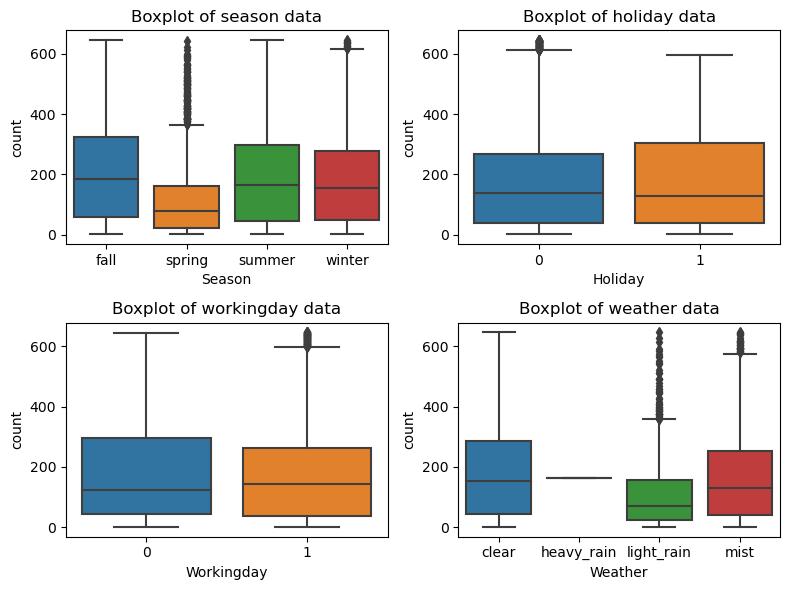

In [61]:
# Understanding the relations betweens categorical columns and count column
plt.figure(figsize= (8,6))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data= data, x= col, y= "count") 
    plt.title(f"Boxplot of {col} data")
    plt.xlabel(col.capitalize())
    
plt.tight_layout()

In [62]:
data['holiday'].value_counts()

holiday
0    10274
1      309
Name: count, dtype: int64

## Observations from Bivariate Analysis:
### Categorical Columns:
#### Season:

- Users rented bikes more in fall and summer having the same median. But the ouliers are more in spring.
- Distribution is fairly uniform across all seasons.
#### Holiday:

- Non-holidays dominate the dataset (10,575 entries or ~97%).
- Holidays are rare (311 entries or ~3%). Even though there is no much significant difference (further verify with tests)
#### Working Day:

- Most data points correspond to working days (7,412 or ~68%).
- Non-working days (3,474 or ~32%) are less frequent.
#### Weather:

- Majority of records are in clear or few-cloud conditions (7,192 or ~66%).
- Misty/cloudy conditions (2,834 or ~26%) are the next most common.
- Severe conditions (light_rain= 859; heavy_rain = 1) are rare.

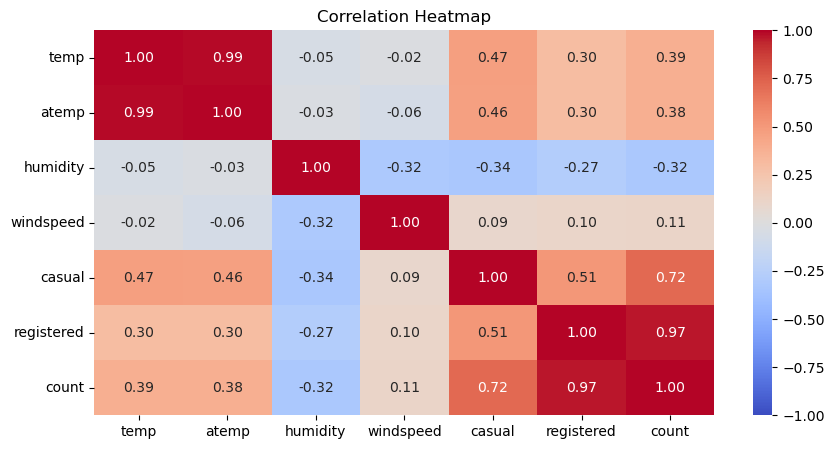

In [63]:
corr_matrix = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Insights from Correlation Heat Map 

### Positve Correlations:
- atemp and temp is showing high positive correlation because they represent almost the same information. So only one columns would be enough, temp column can be removed.
- registered and count(0.97), most of the bikes are used by registered people since it is covering major portion of the total Count
- temp and count(0.39) weak correlation we can say, but it impacts the bike usage. Warmer days might slightly increase bike usage.
### Negative Correlations: 
- humidity and count (-0.39) Negative correlation indicates that higher humidity tends to lower bike usage.Probably due to discomfort in unfavourable weather. Investigating this further could be useful.

### Insights: 
- Focus more on retaining registered user, as they are the major contributers to to
- Doing marketing campaign to use bikes on warm days can increase the Bike usage as they might feel more confortable to ride.
- Promoting more registered users to ride bike on warmer and clear days.

In [64]:
# We can remove the temp columns as atemp and temp are almost the same. 
data.drop("temp", axis= 1, inplace= True)
data.head()

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,clear,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,clear,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,clear,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,clear,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,clear,14.395,75,0.0,0,1,1


In [65]:
# Changing the datetime columns from object to datetime

data["datetime"] = pd.to_datetime(data["datetime"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10583 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10583 non-null  datetime64[ns]
 1   season      10583 non-null  category      
 2   holiday     10583 non-null  category      
 3   workingday  10583 non-null  category      
 4   weather     10583 non-null  category      
 5   atemp       10583 non-null  float64       
 6   humidity    10583 non-null  int64         
 7   windspeed   10583 non-null  float64       
 8   casual      10583 non-null  int64         
 9   registered  10583 non-null  int64         
 10  count       10583 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(2), int64(4)
memory usage: 703.4 KB


## Let's conduct a test to check any significance difference between the bike usage on Weekdays and Weekends

In [66]:
data['weekend'] = data["datetime"].dt.day_name().isin(["Saturday", "Sunday"]) # create a categorical weekend column.
data.head()

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,weekend
0,2011-01-01 00:00:00,spring,0,0,clear,14.395,81,0.0,3,13,16,True
1,2011-01-01 01:00:00,spring,0,0,clear,13.635,80,0.0,8,32,40,True
2,2011-01-01 02:00:00,spring,0,0,clear,13.635,80,0.0,5,27,32,True
3,2011-01-01 03:00:00,spring,0,0,clear,14.395,75,0.0,3,10,13,True
4,2011-01-01 04:00:00,spring,0,0,clear,14.395,75,0.0,0,1,1,True


In [67]:
data.weekend.value_counts()

weekend
False    7470
True     3113
Name: count, dtype: int64

### Independent T-Test:
#### Null Hypothesis(Ho): There is no significance difference in bike usage between the weekdays and weekends
#### Alternate Hypothesis(Ha): There is significance differenc in bike usage between the Weekdays and Weekends

Let's assume the Significance Level(alpha) to 5%

In [68]:
# Categorical vs Numerical for this we do independent T test

alpha = 0.05 #Significance Level

weekend_data = data[data['weekend'] == True]
weekday_data = data[data['weekend'] == False]

t_stat, p_value = stats.ttest_ind(weekend_data['count'],weekday_data["count"],alternative="greater")

if p_value < alpha: 
    print(f"P_value({np.round(p_value,4)}) < alpha({alpha}), There is Significant difference in Bike Usage between Weekdays and Weekends.")
else:
    print(f"P_value({np.round(p_value,4)}) >  alpha({alpha}),There is no Significant difference in Bike Usage between Weekdays and Weekends")

P_value(0.0132) < alpha(0.05), There is Significant difference in Bike Usage between Weekdays and Weekends.


## Let's check about bike usage between holidays and non holidays.


In [69]:
# Categorical vs Numerical for this we do independent T test

alpha = 0.05 #Significance Level

holidays = data[data['holiday'] == 1]['count']
not_holiday = data[data['holiday'] == 0]['count']

t_stat, p_value = stats.ttest_ind(holidays,not_holiday)

# Print the results
print(f"Independent T-test: Statistic = {t_stat}, P-value = {(p_value)}")

if p_value < alpha: 
    print(f"P_value({np.round(p_value,4)}) < alpha({alpha}), There is Significant difference in Bike Usage between Holidays and Non_holidays.")
else:
    print(f"P_value({np.round(p_value,4)}) >  alpha({alpha}),There is no Significant difference in Bike Usage between Holidays and Non_holidays")

Independent T-test: Statistic = 0.8002380245944458, P-value = 0.4235908688796304
P_value(0.4236) >  alpha(0.05),There is no Significant difference in Bike Usage between Holidays and Non_holidays


In [70]:
# Categorical vs Numerical for this we do independent T test

alpha = 0.05 #Significance Level

working_day = data[data['workingday'] == 1]['count']
not_a_working_day = data[data['workingday'] == 0]['count']

t_stat, p_value = stats.ttest_ind(working_day,not_a_working_day, alternative= "less")

# Print the results
print(f"Independent T-test: Statistic = {t_stat}, P-value = {(p_value)}")

if p_value < alpha: 
    print(f"P_value({np.round(p_value,4)}) < alpha({alpha}), There is Significant difference in Bike Usage between Working_day and Non_Working days.")
else:
    print(f"P_value({np.round(p_value,4)}) >  alpha({alpha}),There is no Significant difference in Bike Usage between Working_day and Non_Working days.")

Independent T-test: Statistic = -2.4512041726795246, P-value = 0.007126988110867246
P_value(0.0071) < alpha(0.05), There is Significant difference in Bike Usage between Working_day and Non_Working days.


## T-Test Results:
## Insights:
#### Weekends and Weekday:
- As per the test result: We can say that there is a significant effect on bike rentals in weekday and weekend.
- Observed more bike usage during weekends than weekdays. People want to go out during weekends we can place more bikes near places where more people hangout.
#### Holidays:
- Suprisingly even though there are more entries during non holiday event than holiday event,there no much significant difference in bike usage during holidays and non_Holiday.
- Users may not showing much interest on using electrics bike on holidays. Wheather it is a Holiday or no Holiday it doesn't have much impact on bike usage.
#### Working day and non Working day.
- From T-Test we can conclude that bike usage during non-working day is more than working day.

## Let's Check if the demand of bicycles on rent is the same for different Weather conditions?

In [71]:
data.weather.value_counts()

weather
clear         6962
mist          2770
light_rain     850
heavy_rain       1
Name: count, dtype: int64

#### For this we can use Anova test as there are 4 groups involved.And to perform Anova test, Data should satisfy the Assumptions.
## Anova Test
Assumptions:
- Data should be normally distributed (QQ plot, Shapiro-Wilk tests)
- Rows must be independent from eachother.
- Variance should be close to equal in each group (Levene's test)

In [72]:
# separate the groups according to the weather

clear = data[data['weather']=='clear']['count']
mist = data[data['weather']=='mist']['count']
light_rain = data[data['weather']=='light_rain']['count']
heavy_rain = data[data['weather']=='heavy_rain']['count']

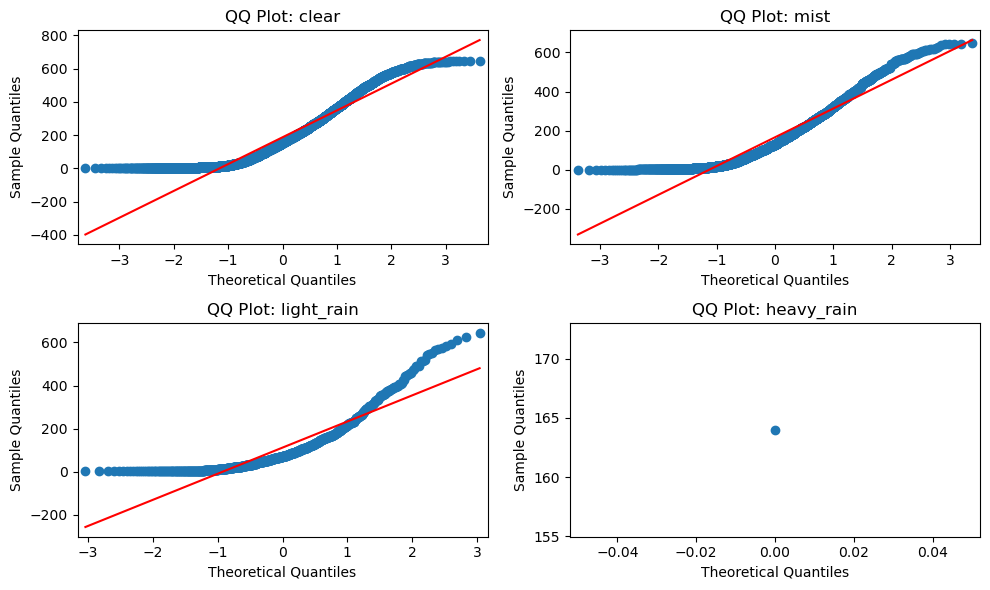

In [73]:
# QQ plot for normal distribution
from statsmodels.graphics.gofplots import qqplot

weather_data = [clear, mist, light_rain, heavy_rain]
weather_names = ["clear", "mist", "light_rain", "heavy_rain"]

# Create subplots for 4 QQ plots
plt.figure(figsize=(10, 6))

for i, (weather, name) in enumerate(zip(weather_data, weather_names), 1):
    plt.subplot(2, 2, i)
    qqplot(weather, line="s", ax=plt.gca())
    plt.title(f"QQ Plot: {name}")

plt.tight_layout()
plt.show() 

### There is no data with normal distribution, Let's perform one more test to verify this.

## Shapiro-Wilk Test:
### Null Hypothesis(Ho): The data is not normally distributed
### Alternate Hypothesis(Ha): The data is normally distributed

In [74]:
# Perform the Shapiro-Wilk test for each data series
stat1, p_value1 = stats.shapiro(clear)
stat2, p_value2 = stats.shapiro(mist)
stat3, p_value3 = stats.shapiro(light_rain)
# not going to do for heavy_rain as it has just one data point.

# Print the results
print(f"Shapiro-Wilk test for Clear weather: Statistic = {stat1}, P-value = {p_value1}")
print(f"Shapiro-Wilk test for  mist weather: Statistic = {stat2}, P-value = {p_value2}")
print(f"Shapiro-Wilk test for  light_rain: Statistic = {stat3}, P-value = {p_value3}")

# Interpret the results for each dataset
def interpret_shapiro(p_value):
    if p_value <= 0.05:
        return "Data is not normally distributed."
    else:
        return "Data is normally distributed."

print("\nInterpretation of results:")
print(f"Clear 1: {interpret_shapiro(p_value1)}")
print(f"Mist 2: {interpret_shapiro(p_value2)}")
print(f"light_rain 3: {interpret_shapiro(p_value3)}")


Shapiro-Wilk test for Clear weather: Statistic = 0.9116995930671692, P-value = 0.0
Shapiro-Wilk test for  mist weather: Statistic = 0.9032399654388428, P-value = 9.532115602307598e-39
Shapiro-Wilk test for  light_rain: Statistic = 0.8118053674697876, P-value = 2.4638935234478347e-30

Interpretation of results:
Clear 1: Data is not normally distributed.
Mist 2: Data is not normally distributed.
light_rain 3: Data is not normally distributed.


From the above test we can conlude that Anova test cannot be performed, but we have another solution for these problem. Before that let's do other tests for improving knowledge.

## Levene's Test:
### To check the variance we use Levene's test
### Null Hypothesis(Ho): Atleast one group has different variance than other groups.
### Alternate Hypothesis(Ha): The variance is same in all groups

In [75]:
# Perform Levene's test
l_stat, p_value = stats.levene(clear,mist,light_rain, heavy_rain)

# Print the results
print(f"Levene's Test statistic: {l_stat}")
print(f"P-value: {p_value}")

# Interpret the results for each dataset
if p_value <= 0.05:
    print("Atleast one group has different variance than other groups")
else:
    print("The variance across all groups are same.")

Levene's Test statistic: 58.369716883672965
P-value: 2.0385458926668884e-37
Atleast one group has different variance than other groups


#### Since all tests failed for Anova testing, In this we can do the Hypothesis tesitng using Kruskal's test

## Kruskal's Test:
### Null Hypothesis(Ho): Weather have no significant effect on the number of bike rides.
### Alternate Hypothesis(H1): Atleast one Weather has a significantly different effect on the number of bike rides.

In [76]:
# Perform Kruskal Test

k_stat, p_value = stats.kruskal(clear,mist,light_rain, heavy_rain)

# Print the results
print(f"Kruskal-Wallis test statistic: {k_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Atleast one weather has a significantly different effect on the number of bike rides.")
else:
    print("Weather have no significant effect on the number of bike rides.")

Kruskal-Wallis test statistic: 186.98317555232958
P-value: 2.7369378742733244e-40
Atleast one weather has a significantly different effect on the number of bike rides.


## Let's Check if the demand of bicycles on rent is the same for different Seasons?

In [77]:
data['season'].value_counts()

season
spring    2670
winter    2664
summer    2633
fall      2616
Name: count, dtype: int64

In [78]:
# separate the groups according to the season
spring = data[data['season']=='spring']['count']
winter = data[data['season']=='winter']['count']
summer = data[data['season']=='summer']['count']
fall = data[data['season']=='fall']['count']


# Let's check the normality of the give sets using Shapiro-Wilk test
# Null Hypothesis(Ho): The data is not normally distributed
# Alternate Hypothesis(Ha): The data is normally distributed


# Perform the Shapiro-Wilk test for each data series
statb1, p_value1 = stats.shapiro(spring)
statb2, p_value2 = stats.shapiro(winter)
statb3, p_value3 = stats.shapiro(summer)
statb4, p_value4 = stats.shapiro(fall)

# Print the results
print(f"Shapiro-Wilk test for Spring : Statistic = {statb1}, P-value = {p_value1}")
print(f"Shapiro-Wilk test for  Winter  : Statistic = {statb2}, P-value = {p_value2}")
print(f"Shapiro-Wilk test for  summer: Statistic = {statb3}, P-value = {p_value3}")
print(f"Shapiro-Wilk test for  fall  : Statistic = {statb4}, P-value = {p_value4}")

# Interpret the results for each dataset
def interpret_shapiro(p_value):
    if p_value <= 0.05:
        return "Data is not normally distributed."
    else:
        return "Data is normally distributed."

print("\nInterpretation of results:")
print(f"Spring 1: {interpret_shapiro(p_value1)}")
print(f"Winter 2: {interpret_shapiro(p_value2)}")
print(f"summer 3: {interpret_shapiro(p_value3)}")
print(f"fall 4: {interpret_shapiro(p_value4)}")

Shapiro-Wilk test for Spring : Statistic = 0.8313114047050476, P-value = 0.0
Shapiro-Wilk test for  Winter  : Statistic = 0.919049084186554, P-value = 1.3193750315544908e-35
Shapiro-Wilk test for  summer: Statistic = 0.9153966903686523, P-value = 4.78203140974081e-36
Shapiro-Wilk test for  fall  : Statistic = 0.9372013807296753, P-value = 6.607938637391792e-32

Interpretation of results:
Spring 1: Data is not normally distributed.
Winter 2: Data is not normally distributed.
summer 3: Data is not normally distributed.
fall 4: Data is not normally distributed.


In [79]:
# Perform the Shapiro-Wilk test for each data series
l_stats, p_value = stats.levene(spring, winter, summer, fall)

# Print the results
print(f"levene test for all groups : Statistic = {l_stats}, P-value = {(p_value)}")


# Interpret the results for each dataset
if p_value <= 0.05:
    print("Atleast one group has different variance than other groups")
else:
    print("The variance across all groups are same.")


levene test for all groups : Statistic = 177.52397676140941, P-value = 2.6643548968275643e-112
Atleast one group has different variance than other groups


In [80]:
# Perform the Kruskal's wali test
k_stats, p_value = stats.kruskal(spring, winter, summer,fall )

# Print the results
print(f"Kruskal's test for all groups : Statistic = {k_stats}, P-value = {(p_value)}")

# Interpret the Hypothesis for all groups

if p_value < 0.05:
    print("Atleast one season has a significantly different effect on the number of bike rides.")
else:
    print("Seasons have no significant effect on the number of bike rides.")

Kruskal's test for all groups : Statistic = 619.3679817851395, P-value = 6.376253250003707e-134
Atleast one season has a significantly different effect on the number of bike rides.


In [81]:
weather_agg = data.groupby(by='weather')['count'].mean().reset_index()

# Percentage drop in mist
mist_weather_drop_percentage = (weather_agg['count'][0] - weather_agg['count'][3])/(weather_agg)['count'][0]

# Percentage drop in light_rain
light_rain_weather_drop_percentage = (weather_agg['count'][0] - weather_agg['count'][2])/(weather_agg)['count'][0]

print(f"The percentage drop in Bike rental during mist is {np.round(mist_weather_drop_percentage*100,2)}%")
print(f"The percentage drop in Bike rental during light_rain is {np.round(light_rain_weather_drop_percentage*100,2)}%")

The percentage drop in Bike rental during mist is 11.23%
The percentage drop in Bike rental during light_rain is 40.22%


In [82]:
season_agg = data.groupby(by='season')['count'].mean().reset_index()
season_agg

# Percentage drop in mist
spring_drop_percentage = (season_agg['count'][0] - season_agg['count'][1])/(season_agg)['count'][0]

# Percentage drop in light_rain
winter_drop_percentage = (season_agg['count'][0] - season_agg['count'][3])/(season_agg)['count'][0]

print(f"The percentage drop in Bike rental during spring is {np.round(spring_drop_percentage*100,2)}%")
print(f"The percentage drop in Bike rental during winter is {np.round(winter_drop_percentage*100,2)}%")

The percentage drop in Bike rental during spring is 46.41%
The percentage drop in Bike rental during winter is 12.39%


### So season does have effect on bike Usage

## Kruskal Test insights:
### Weather Patterns
- To analyze about weather patterns we want to Use Anova test, But for this test there are few assumptions that needs to be satisfied.
- Since the assumptions have been failed, We have used Kruskal Test.
- based on Observations from kruskal test. Weather Significantly impact bike usage.
- As clear weather have more number of customers but change in weather like mist has decresed bike usage by 11.23% and light_rain has decreased the bike usage by 40.22%.

### Seasonal Patterns:
- Similar to weather data, season data did not satisfy the assumption/conditions to perform Anova test
- So we did perform the kruskal test. Results were: Season impacts the bike usage.
- Bike rentals peak during Summer and Fall, while spring sees a 46.41% decline. Aligning operational capacity and marketing with these seasonal trends can improve efficiency.

### Check if the Weather conditions are significantly different during different Seasons?

## Chi-Sqaure Test
### When we have to compare two catergorical columns we use the Chi-Sqaure test
### Null Hypothesis(Ho): Weather has no dependency on Season.
### Alternate Hypothesis(Ha): Weahter is dependent on the Season.

In [83]:
# Create a contingency table
contingency_table = pd.crosstab(data['season'], data['weather'])
contingency_table

weather,clear,heavy_rain,light_rain,mist
season,,,,
fall,1842,0,195,579
spring,1744,1,211,714
summer,1720,0,223,690
winter,1656,0,221,787


In [84]:
# Perform Chi-square test
chi_stats, p_value, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05 #Singificance value
print(f"Chi-square Statistic: {chi_stats}")
print(f"P-value: {p_value}")

if p_value < alpha: 
    print("Reject the Null Hypothesis (H0): Weather depends on Season")
else:
    print("Fail to Reject the Null Hypothesis (H0): Weather is independent of Season")


Chi-square Statistic: 47.16590591959626
P-value: 3.6550317439064943e-07
Reject the Null Hypothesis (H0): Weather depends on Season


### T-test Independent:

- Bike usage is significantly higher on weekends than weekdays. Focus promotional campaigns on weekends to maximize casual user engagement.
### Kruskal-Wallis:

- Non-parametric analysis confirms significant seasonal differences in rentals. Further analysis shows Fall has the highest median rentals.

### Chi-square:

- Weather patterns are significantly different across seasons. Align bike availability with clear weather in fall and in Spring as it has the more number of users in clear weather across all the seasons.



### Summary of Insights:
#### User Segmentation:

- Registered users contribute the majority of bike rentals (90%). Retention strategies like loyalty programs can significantly boost usage.

- Clear weather leads to the highest bike usage, while rentals drop by 10-35% during misty or rainy conditions.
- Plan operational strategies to align with favorable weather conditions and offer incentives during adverse weather.
### Seasonal Trends:

- Bike rentals peak in Spring and Fall, with a significant decline in Winter. Adjust resource allocation and marketing intensity accordingly.
### Weekdays vs. Weekends:

- There is a significant difference in bike usage between weekdays and weekends. Weekends see higher user activity.
### Weather and Season Relationship:

- Weather conditions vary significantly across seasons (Chi-square test). For instance, clear weather is more common in Summer, while mist and rain dominate Fall and Winter.
### Operational Efficiency:

- Reduce bike deployment during low-demand periods (e.g., Winter) to minimize idle inventory.
- Scale resources during high-demand seasons and weekends.
### Recommendations:
- Focus on retaining registered users with subscription benefits.
- Attract casual users through seasonal and weekend promotions.
- Adjust bike availability and operational efforts based on weather and seasonal trends.